<a href="https://colab.research.google.com/github/ReynaldiJ/portfolio/blob/main/Supervised_Classification_(RF%2CNB%2CLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#2. Read then show information and numerical descriptive data

df_raw = pd.read_excel("/content/diabetes.xlsx")
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

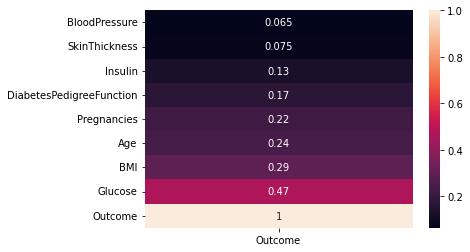

In [ ]:
#3. Create correlation heatmap
corr_raw = df_raw.corr()[['Outcome']].sort_values(by = 'Outcome')
sns.heatmap(corr_raw, annot = True)

<Axes: >

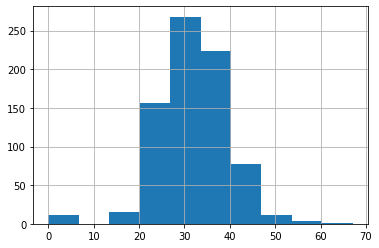

In [ ]:
#4. Histogram for "BMI" and "Glucose"
df_raw['BMI'].hist()

<Axes: >

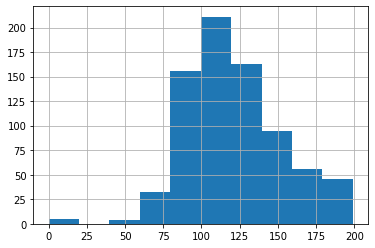

In [ ]:
df_raw['Glucose'].hist()

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

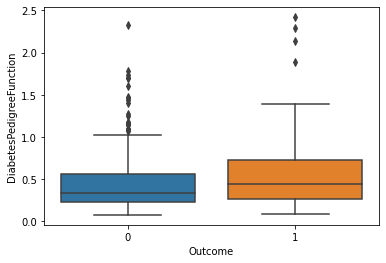

In [ ]:
#5. Create boxplot for "DiabetesPedigreeFunction" to compare Diabetes vs non-Diabetes
sns.boxplot(x='Outcome', y = 'DiabetesPedigreeFunction', data = df_raw)

In [ ]:
#6. Show value 0
print('Sum of value equals 0:')
print('Glucose :', df_raw['Glucose'].value_counts()[0])
print('BloodPressure :', df_raw['BloodPressure'].value_counts()[0])
print('SkinThickness :', df_raw['SkinThickness'].value_counts()[0])
print('BMI :', df_raw['BMI'].value_counts()[0])

Sum of value equals 0:
Glucose : 5
BloodPressure : 35
SkinThickness : 227
BMI : 11


In [ ]:
#7. Drop column
df_clean = df_raw.copy()
df_clean1 = df_clean[df_clean['Glucose'] != 0]
df_clean2 = df_clean1[df_clean1['BloodPressure'] != 0]
df_clean3 = df_clean2[df_clean2['BMI'] != 0]
df_clean3.reset_index(inplace = True)

In [ ]:
#8. Impute 'SkinThickness'

SK_mean_0 = df_clean3[df_clean3['SkinThickness'] != 0]['SkinThickness'].mean()
#Didapatkan value = 29.18233082706767 untuk mean SkinThickness tanpa value 0

#Mean dibulatkan karena 'SkinThickness memiliki data type int
df_clean3['SkinThickness'].replace(0, round(SK_mean_0), inplace = True)

df_clean3['SkinThickness'].head(10)

<ipython-input-127-cb69b392e376>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean3['SkinThickness'].replace(0, round(SK_mean_0), inplace = True)


0    35
1    29
2    29
3    23
4    35
5    29
6    32
7    45
8    29
9    29
Name: SkinThickness, dtype: int64

In [ ]:
#checkpoint
df_eng = df_clean3.copy()
df_eng.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,29,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Import Library ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
#9. Seperate predictor from target and split into training and validation sets

x_train, x_validation, y_train, y_validation = train_test_split(df_eng.drop('Outcome', axis = 1),
                                                                df_eng['Outcome'],
                                                                test_size = 0.3,
                                                                random_state = 99)

In [ ]:
x_train

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
153,162,0,114,80,34,285,44.2,0.167,27
180,191,9,123,70,44,94,33.1,0.374,40
287,304,3,150,76,29,0,21.0,0.207,37
375,399,3,193,70,31,0,34.9,0.241,25
637,677,0,93,60,29,0,35.3,0.263,25
...,...,...,...,...,...,...,...,...,...
713,757,0,123,72,29,0,36.3,0.258,52
168,178,5,143,78,29,0,45.0,0.190,47
185,197,3,107,62,13,48,22.9,0.678,23
35,38,2,90,68,42,0,38.2,0.503,27


In [ ]:
y_train

153    0
180    0
287    0
375    1
637    0
      ..
713    1
168    0
185    1
35     1
641    1
Name: Outcome, Length: 506, dtype: int64

In [ ]:
#10. Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

predict = log_model.predict(x_train)
report = classification_report(y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       330
           1       0.60      0.45      0.52       176

    accuracy                           0.71       506
   macro avg       0.67      0.65      0.65       506
weighted avg       0.69      0.71      0.69       506



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#11. Logistic Validation Report
predict = log_model.predict(x_validation)
LR_report = classification_report(y_validation, predict)
print(LR_report)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       145
           1       0.58      0.47      0.52        73

    accuracy                           0.71       218
   macro avg       0.67      0.65      0.65       218
weighted avg       0.69      0.71      0.70       218



In [ ]:
#12. Train Gaussian NB
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(x_train, y_train)
predict = clf.predict(x_train)
report = classification_report(y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       330
           1       0.66      0.61      0.64       176

    accuracy                           0.75       506
   macro avg       0.73      0.72      0.73       506
weighted avg       0.75      0.75      0.75       506



In [ ]:
#13. NB Validation Report
predict = clf.predict(x_validation)
NB_report = classification_report(y_validation, predict)
print(NB_report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       145
           1       0.64      0.67      0.65        73

    accuracy                           0.76       218
   macro avg       0.73      0.74      0.74       218
weighted avg       0.77      0.76      0.76       218



In [ ]:
#14. Train Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(max_depth = 2, random_state = 0)
random_forest.fit(x_train, y_train)
predict = random_forest.predict(x_train)
report = classification_report(y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       330
           1       0.79      0.47      0.59       176

    accuracy                           0.77       506
   macro avg       0.78      0.70      0.72       506
weighted avg       0.78      0.77      0.76       506



In [ ]:
#15. Random Forest Validation Report
predict = random_forest.predict(x_validation)
rf_report = classification_report(y_validation, predict)
print(rf_report)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       145
           1       0.85      0.47      0.60        73

    accuracy                           0.79       218
   macro avg       0.82      0.71      0.73       218
weighted avg       0.80      0.79      0.77       218



0.52
0.65
0.60


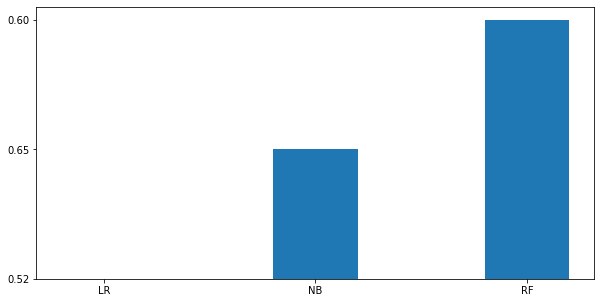

In [ ]:
#16. Barplot
print(LR_report.split()[12])
print(NB_report.split()[12])
print(rf_report.split()[12])


data = {'LR':LR_report.split()[12],
        'NB':NB_report.split()[12],
        'RF':rf_report.split()[12]}
model = list(data.keys())
F1_values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(model, F1_values,width = 0.4)
plt.show()